In [1]:
from mnist import MNIST
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [199]:
# A.4

In [64]:
def coord_desc_lasso(w,X,Y,lam):
    d = len(X[0,:])-1   #d=num features
    b = (1/n)*np.sum(Y - X[:,:d]@w[:d])
    a=2*(np.sum(X*X,axis=0))
    c=np.zeros(d)
    for k in range(d):
        c[k] = 2*X[:,k]@(Y-(b + np.delete(X[:,:d],k,axis=1) @ np.delete(w[:d],k)))
        if c[k] < -lam:
            w[k] = (c[k]+lam)/a[k]
        elif c[k] >= -lam and c[k] <= lam:
            w[k] = 0
        else:
            w[k] = (c[k]-lam)/a[k]
    return w

In [65]:
n=500
d=1000
k=100
X=np.zeros((n,d+1))   #extra column
X[:,:d]=np.random.multivariate_normal(np.zeros(d),np.identity(d),n)
X[:,d] = np.random.normal(0,1,n)  #last column holds errors epsilon_i
w=np.zeros(d+1)
for j in range(k):
    w[j] = (j+1)/k
w[d] = 1 #set last component to 1 for vectorization
Y = X@w

In [68]:
avg_y = np.mean(Y)
max_lam = max( [2*abs(np.sum((Y-avg_y)*X[:,k])) for k in range(d)] )
lam = [max_lam/((2)**j) for j in range(15)]
num_variables_zero = np.zeros(15)
keepIterating = True
FDR=np.zeros(15)
TPR=np.zeros(15)
for j in range(15):
    current_w = np.zeros(d+1)
    while keepIterating:
        new_w = coord_desc_lasso(current_w,X,Y,lam[j])
        keepIterating = (max(abs(new_w - current_w)) > .01)
    num_variables_zero[j] = np.sign(new_w).dot(np.sign(new_w))
    FDR[j] = (new_w[k:d].dot(new_w[k:d])) / num_variables_zero[j]
    TPR[j] = (new_w[0:k].dot(new_w[0:k])) / k
    keepIterating = True

<ipython-input-68-afc4b82f79bb>:14: RuntimeWarning: invalid value encountered in double_scalars
  FDR[j] = (new_w[k:d].dot(new_w[k:d])) / num_variables_zero[j]


Text(0, 0.5, 'Number of Nonzero Entries')

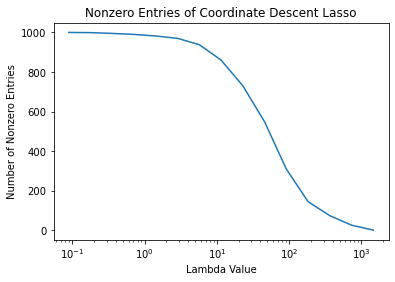

In [69]:
plt.plot(lam,num_variables_zero)
plt.title('Nonzero Entries of Coordinate Descent Lasso')
plt.xscale('log')
plt.xlabel('Lambda Value')
plt.ylabel('Number of Nonzero Entries')

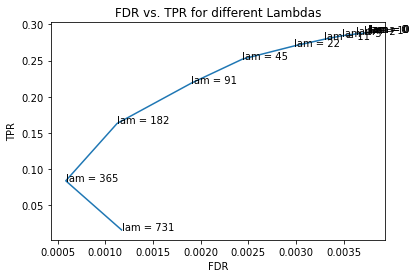

In [70]:
plt.plot(FDR,TPR)
plt.xlabel("FDR")
plt.ylabel("TPR")
plt.title("FDR vs. TPR for different Lambdas")
for j in range(15):
    plt.annotate("lam = "+ str(int(lam[j])), (FDR[j],TPR[j]))

In [ ]:
# A.5

In [75]:
#slight change from original coord_desc_lasso due to differences
#in input arrays
def coord_desc_lasso_crime(w,X,Y,lam):
    d = len(X[0,:])   #d=num features
    b = (1/n)*np.sum(Y - X[:,:d]@w)
    a=2*(np.sum(X*X,axis=0))
    c=np.zeros(d)
    for k in range(d):
        c[k] = 2*X[:,k]@(Y-(b + np.delete(X[:,:d],k,axis=1) @ np.delete(w[:d],k)))
        if c[k] < -lam:
            w[k] = (c[k]+lam)/a[k]
        elif c[k] >= -lam and c[k] <= lam:
            w[k] = 0
        else:
            w[k] = (c[k]-lam)/a[k]
    return w

In [72]:
import pandas as pd
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")
X_train = df_train.values[:,1:96]
Y_train = df_train.values[:,0]
X_test = df_test.values[:,1:96]
Y_test = df_test.values[:,0]

In [73]:
n = len(Y_train)
d = len(X_train[0,:])
avg_y = np.mean(Y_train)
max_lam = max( [2*abs(np.sum((Y-avg_y)*X[:,k])) for k in range(d)] )

In [77]:
lam = [max_lam/((2)**j) for j in range(16)]
num_variables_zero = np.zeros(16)
keepIterating = True
models = np.zeros((16,d))
for j in range(16):
    current_w = np.zeros(d)
    while keepIterating:
        new_w = coord_desc_lasso_crime(current_w,X_train,Y_train,lam[j])
        keepIterating = (max(abs(new_w - current_w)) > .1)
    num_variables_zero[j] = np.sign(new_w).dot(np.sign(new_w))
    models[j,:] = new_w
    keepIterating = True

Text(0, 0.5, 'Number of Nonzero Entries')

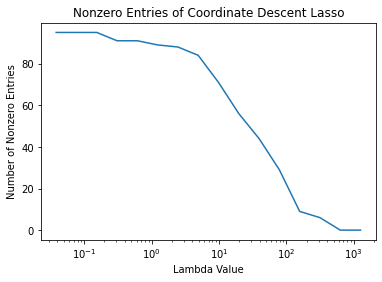

In [78]:
plt.plot(lam,num_variables_zero)
plt.title('Nonzero Entries of Coordinate Descent Lasso')
plt.xscale('log')
plt.xlabel('Lambda Value')
plt.ylabel('Number of Nonzero Entries')

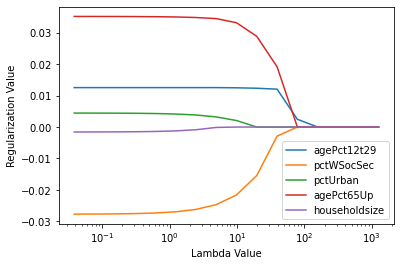

In [79]:
plt.plot(lam, models[:,3], label = "agePct12t29")
plt.plot(lam, models[:,12], label = "pctWSocSec")
plt.plot(lam, models[:,7], label = "pctUrban")
plt.plot(lam, models[:,5], label = "agePct65Up")
plt.plot(lam, models[:,1], label = "householdsize")
plt.xscale('log')
plt.xlabel('Lambda Value')
plt.ylabel('Regularization Value')
plt.legend()

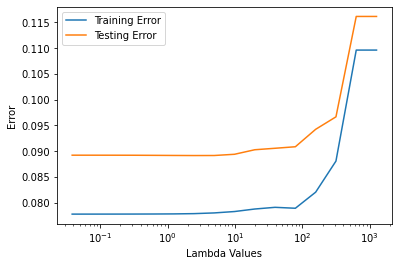

In [80]:
training_error = np.zeros(16)
test_error = np.zeros(16)
for j in range(16):
    train_predict = X_train @ models[j,:].transpose()
    training_error[j] = ((Y_train - train_predict).dot(Y_train - train_predict))/n
    test_predict = X_test @ models[j,:].transpose()
    test_error[j] = ((Y_test - test_predict).dot(Y_test - test_predict))/len(X_test[:,0])
plt.plot(lam, training_error, label = "Training Error")
plt.plot(lam, test_error, label = "Testing Error")
plt.xscale('log')
plt.xlabel('Lambda Values')
plt.ylabel('Error')
plt.legend()

In [88]:
lam = 30
keepIterating = True
current_w = np.zeros(d)
while keepIterating:
    new_w = coord_desc_lasso_crime(current_w,X_train,Y_train,lam)
    keepIterating = (max(abs(new_w - current_w)) > .01)
least_corr = np.argmin(new_w)
most_corr = np.argmax(new_w)
print(least_corr)
print(most_corr)

8
0


In [89]:
df_train

,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.67,-0.45,-1.85,-1.06,0.67,0.08,-0.85,-0.34,0.68,-0.24,...,-0.23,-0.02,-0.53,-1.08,-0.13,-0.66,-0.41,-0.56,1.26,-0.39
1,0.43,-0.45,-0.27,-0.22,-0.17,-0.34,-0.58,-0.50,-1.57,-0.29,...,-0.23,-0.33,-0.58,0.03,0.22,-0.46,-0.50,-0.11,-0.62,-0.39
2,0.12,-0.14,1.87,0.55,0.04,0.02,-1.19,-0.03,0.68,1.05,...,-0.23,-0.11,-1.51,1.07,0.07,-0.01,-0.41,0.77,0.52,-0.39
3,0.03,-0.38,0.53,-0.28,-0.79,-0.64,-0.35,-0.34,0.46,0.66,...,-0.23,-0.46,0.54,0.58,-0.08,-0.61,-0.23,-0.70,-0.62,-0.39
4,0.14,-0.30,-1.12,-0.74,-0.10,-0.40,-0.30,-0.19,0.68,0.76,...,-0.23,2.10,-0.92,-0.25,0.52,-0.06,-0.50,1.71,-0.27,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0.09,-0.38,-0.39,0.04,0.11,0.08,-0.69,-0.27,0.68,0.28,...,-0.23,0.02,-1.61,-1.08,-0.73,-1.32,-0.50,0.23,-0.49,-0.39
1591,0.45,-0.06,3.03,1.71,2.55,2.36,-1.58,-0.03,0.68,-0.39,...,-0.23,1.36,-1.76,-2.01,-2.63,-3.29,-0.41,0.68,0.17,-0.39
1592,0.23,0.81,-0.57,-0.48,0.04,-0.16,0.65,0.83,0.68,-0.24,...,-0.03,0.15,0.35,0.41,0.82,0.55,0.13,0.43,0.08,3.40
1593,0.19,0.18,0.28,1.00,1.71,1.76,-0.07,0.20,0.68,0.38,...,-0.13,1.01,0.15,0.03,-0.18,-0.66,-0.32,0.72,0.73,0.52


In [ ]:
# A.6

In [1]:
def load_dataset():
    mndata = MNIST('/Users/joseph/Courses/cse546/hw2/mnist')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return [X_train, labels_train, X_test, labels_test]

[X_train, labels_train, X_test, labels_test] = load_dataset()

In [183]:
#computes gradient descent, returns whether grad is small enough
#w = model
#y = labels, +-1
#X = data
#lam = regularization constant
#eta = step size
def grad_descent(w,X,y,lam,eta):
    n = len(w)-1  #785-1=784
    mu = 1/(1+np.exp(-y*(X@w))) 
    grad = np.zeros(n+1)    #gradient
    temp = y*(1-mu)
    grad[:n] = -(1/n)*(  np.transpose(temp)  @X[:,:n]) + 2*lam*w[:n]
    grad[n] = -(1/n)*(sum(temp))
    keepIterating = (la.norm(grad)>.1)
    return [w - eta*grad, keepIterating]

#computes iteration of stochastic gradient descent
#batch size = number of variables to use
def stoc_grad_descent(w,X,y,lam,eta,batch_size):
    n = len(w)-1  #785-1=784
    random_variables = np.random.randint(0,n,size=batch_size)
    grad = np.zeros(n+1)    #gradient
    mu = 1/(1+np.exp(-y[random_variables]*(X[random_variables,:]@w)))
    temp = y[random_variables]*(1-mu)
    grad[:n] = -(1/batch_size)*(  np.transpose(temp)  @X[random_variables,:n]) + 2*lam*w[:n]
    grad[n] = -(1/batch_size)*(sum(temp))
    keepIterating = (la.norm(grad)>.1)
    return [w - eta*grad, keepIterating]

#computes J(w,b) for part b(i)
def loss(w,X,y,lam):
    n = len(X[:,0])
    J = (1/n)*np.sum(np.log(1+np.exp(-y*(X@w)))) + lam*la.norm(w)
    return J

In [130]:
#computes classification error for b(ii)
def classify(w,X):
    return np.sign(X@w)

In [2]:
# Remove non-2's and 7's from X_train and X_test, replace in labels with 1 and -1
n = len(X_train[:,1])
n2 = len(X_test[:,1])

train_27 = []
test_27 = []

for i in range(n): 
    if (labels_train[i] == 2) or (labels_train[i] == 7):
        train_27.append(i)
for i in range(n2):
    if (labels_test[i] == 2) or (labels_test[i] == 7):
        test_27.append(i)

In [3]:
X_train = X_train[train_27,:]
X_test = X_test[test_27,:]
labels_train = labels_train[train_27].astype(int)
labels_test = labels_test[test_27].astype(int)
for i in range(len(labels_train)):
    if labels_train[i] == 2:
        labels_train[i] = -1
    elif labels_train[i] == 7:
        labels_train[i] = 1
for i in range(len(labels_test)):
    if labels_test[i] == 2:
        labels_test[i] = -1
    elif labels_test[i] == 7:
        labels_test[i] = 1

In [4]:
n=len(labels_train)
n2=len(labels_test)
d=784
X_train_new = np.zeros([n,d+1]) 
X_test_new = np.zeros([n2,d+1])
X_train_new[:,:d] = X_train
X_test_new[:,:d] = X_test
X_train_new[:,d] = np.ones(n)
X_test_new[:,d] = np.ones(n2)

In [145]:
current_w = np.zeros(d+1)
new_w = np.zeros(d+1)
eta = .1
lam = .1
error_train=[]
error_test=[]
train_class_err = []
test_class_err = []
keepIterating = True
while keepIterating:
    current_w = new_w
    [new_w, keepIterating] = grad_descent(current_w,X_train_new,labels_train,lam,eta)
    error_train.append(loss(new_w,X_train_new,labels_train,lam))
    error_test.append(loss(new_w,X_test_new,labels_test,lam))
    predict_train = classify(new_w, X_train_new)
    predict_test = classify(new_w, X_test_new)
    train_class_err.append(sum((1/2)*abs(labels_train-predict_train))/len(X_train_new[:,0]))
    test_class_err.append(sum((1/2)*abs(labels_test-predict_test))/len(X_test_new[:,0]))

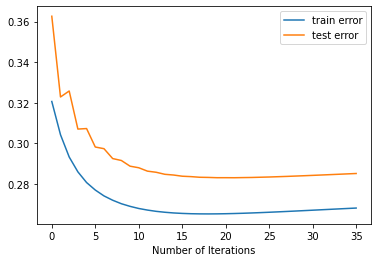

In [146]:
plt.plot(error_train,label="train error")
plt.plot(error_test, label="test error")
plt.xlabel("Number of Iterations")
plt.legend()

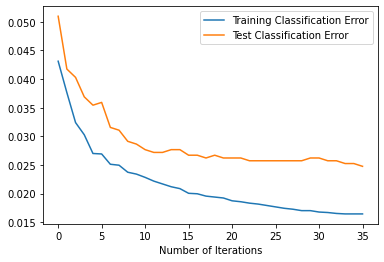

In [147]:
plt.plot(train_class_err, label="Training Classification Error")
plt.plot(test_class_err, label="Test Classification Error")
plt.xlabel("Number of Iterations")
plt.legend()

In [196]:
# (c) stochastic gradient descent, batch size = 1
batch_size = 100
current_w = np.zeros(d+1)
new_w = np.zeros(d+1)
eta = .05
lam = .1
error_train=[]
error_test=[]
train_class_err = []
test_class_err = []
keepIterating = True
while keepIterating:
    current_w = new_w
    [new_w, keepIterating] = stoc_grad_descent(current_w,X_train_new,labels_train,lam,eta,batch_size)
    error_train.append(loss(new_w,X_train_new,labels_train,lam))
    error_test.append(loss(new_w,X_test_new,labels_test,lam))
    predict_train = classify(new_w, X_train_new)
    predict_test = classify(new_w, X_test_new)
    train_class_err.append(sum((1/2)*abs(labels_train-predict_train))/len(X_train_new[:,0]))
    test_class_err.append(sum((1/2)*abs(labels_test-predict_test))/len(X_test_new[:,0]))

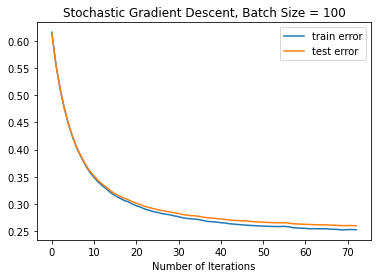

In [197]:
plt.plot(error_train,label="train error")
plt.plot(error_test, label="test error")
plt.xlabel("Number of Iterations")
plt.title("Stochastic Gradient Descent, Batch Size = "+str(batch_size))
plt.legend()

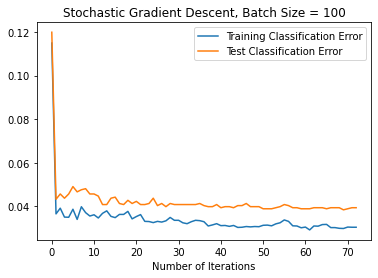

In [198]:
plt.plot(train_class_err, label="Training Classification Error")
plt.plot(test_class_err, label="Test Classification Error")
plt.xlabel("Number of Iterations")
plt.title("Stochastic Gradient Descent, Batch Size = "+str(batch_size))
plt.legend()

In [ ]:
# B.4

In [49]:
import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [121]:
X_train = datasets.MNIST('mnist2', train=True, download = True, transform=transforms.ToTensor())
train_loader = DataLoader(X_train, batch_size=100)

In [117]:
model = nn.Sequential(
    nn.Linear(784,10)
)

In [118]:
optimizer = optim.SGD(model.parameters(), lr=.01)  #use stochastic gradient descent

In [119]:
loss = nn.MSELoss()

In [129]:
epochs = 5
for epoch in range(epochs):
    for batch in train_loader:
        image, label = batch
        b = image.size(0)
        image = image.view(b,-1)
        labels=torch.zeros(100,10)
        for j in range(100):
            labels[j,label[j]] = 1
        
        y_hat = model(image) #prediction
        J = loss(y_hat, labels)  #compute objective
        
        model.zero_grad()   #zero out weights
        J.backward()
        
        optimizer.step()   #apply gradient descent
        
    print(f'Epoch {epoch+1}, train loss: {J.item()}')

Epoch 1, train loss: 0.06095045059919357
Epoch 2, train loss: 0.054762471467256546
Epoch 3, train loss: 0.05184740573167801
Epoch 4, train loss: 0.049983881413936615
Epoch 5, train loss: 0.048642124980688095


In [130]:
X_train2 = datasets.MNIST('mnist2', train=True, download = True, transform=transforms.ToTensor())
train_loader2 = DataLoader(X_train2, batch_size=60000)

In [131]:
for batch in train_loader2:
    image, label = batch
    b = image.size(0)
    image = image.view(b,-1)
    
    y_hat = model(image)
    predictions = torch.zeros((60000,1))
    for j in range(60000):
        predictions[j] = torch.argmax(y_hat[j,:])
    
    accuracy = 60000
    for j in range(60000):
        if predictions[j] != label[j]:
            accuracy = accuracy - 1
    accuracy = accuracy / 60000
print(accuracy)

0.8354333333333334


In [132]:
X_test = datasets.MNIST('mnist2', train=False, download = True, transform=transforms.ToTensor())
train_loader_test = DataLoader(X_test, batch_size=10000)

In [133]:
for batch in train_loader_test:
    image, label = batch
    b = image.size(0)
    image = image.view(b,-1)
    
    y_hat = model(image)
    predictions = torch.zeros((10000,1))
    for j in range(10000):
        predictions[j] = torch.argmax(y_hat[j,:])
    
    accuracy = 10000
    for j in range(10000):
        if predictions[j] != label[j]:
            accuracy = accuracy - 1
    accuracy = accuracy / 10000
print(accuracy)

0.8459


In [ ]:
# B.5

In [134]:
import math

In [136]:
n = 20000
d = 10000
X = np.zeros((n,d))
for j in range(n):
    X[j,j%d] = math.sqrt((j%d)+1)

Y = np.random.normal(0,1,n)
inv = np.zeros((d,d))
for j in range(d):
    inv[j,j] = 1/(j+1)   #explicitly compute (X^TX)^{-1}
inv = 0.5 * inv
beta = inv @ (X.transpose() @ Y)

In [138]:
jvals = range(1,d+1)
lower = np.zeros(d)
upper = np.zeros(d)
for j in range(d):
    lower[j] = -math.sqrt(inv[j,j]*2*math.log(2/.05))
    upper[j] = math.sqrt(inv[j,j]*2*math.log(2/.05))

out_of_range=0
for j in range(d):
    if beta[j] > upper[j] or beta[j] < lower[j]:
        out_of_range+=1
print('The number of beta j that are out of given interval is ' + str(out_of_range))

The number of beta j that are out of given interval is 62


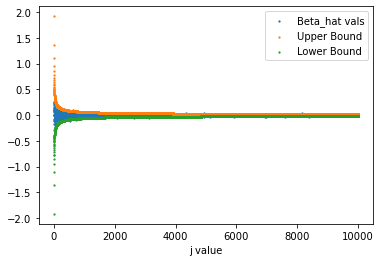

In [142]:
plt.scatter(jvals,beta, s=1.6, label = 'Beta_hat vals')
plt.scatter(jvals, upper, s=1.6, label='Upper Bound')
plt.scatter(jvals, lower, s=1.6, label='Lower Bound')
plt.xlabel('j value'); plt.legend()

In [144]:
beta[0]

-0.11108781126328858

In [146]:
lower[0]

-1.9206455826398414